In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as imp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df1=pd.read_csv(r"C:\Users\ajmal\Downloads\train_ctrUa4K.csv")
df2=pd.read_csv(r"C:\Users\ajmal\Downloads\test_lAUu6dG.csv")

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

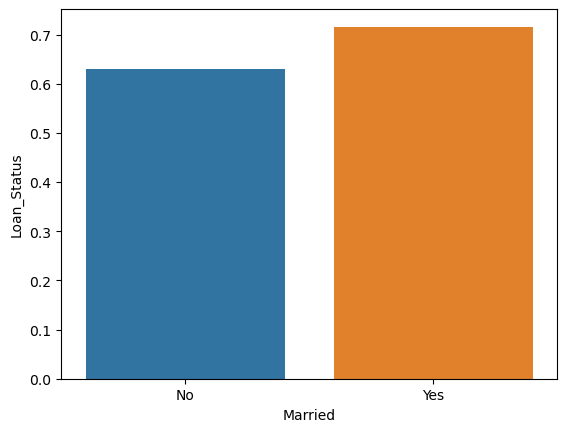

In [3]:
df1['Loan_Status'] = df1['Loan_Status'].map({ 'N' : 0, 'Y' : 1})
sns.barplot(x='Married',y='Loan_Status',data=df1,ci=None)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

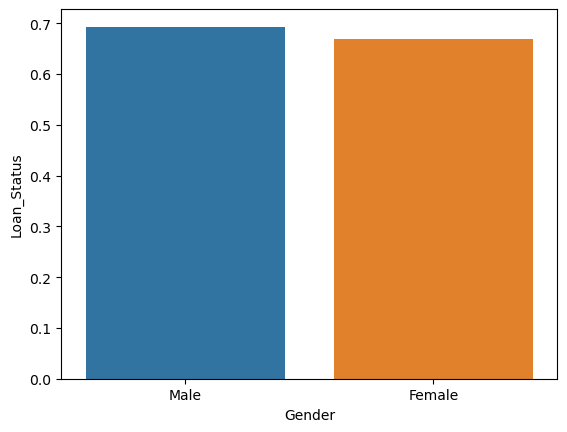

In [4]:
sns.barplot(x='Gender',y='Loan_Status',data=df1,ci=None)

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

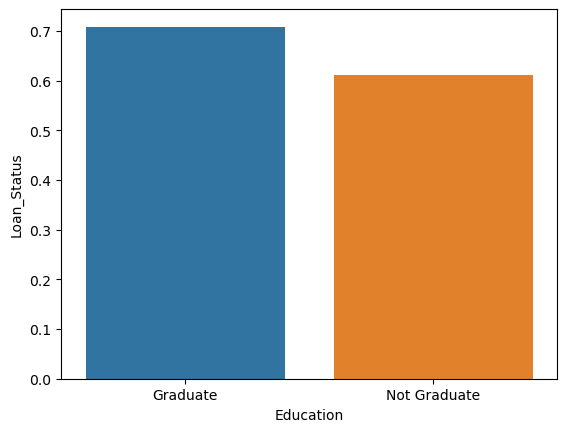

In [5]:
sns.barplot(x='Education',y='Loan_Status',data=df1,ci=None)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

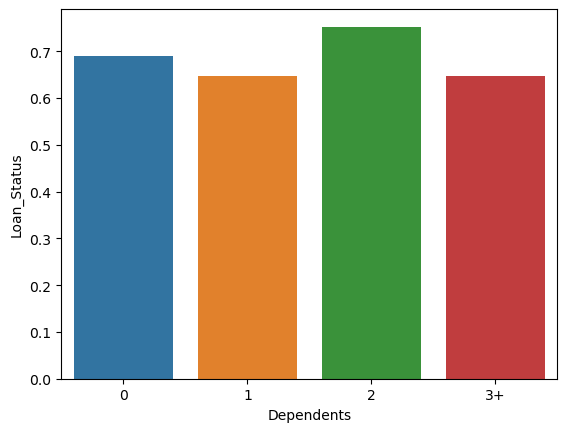

In [6]:
sns.barplot(x='Dependents',y='Loan_Status',data=df1,ci=None)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

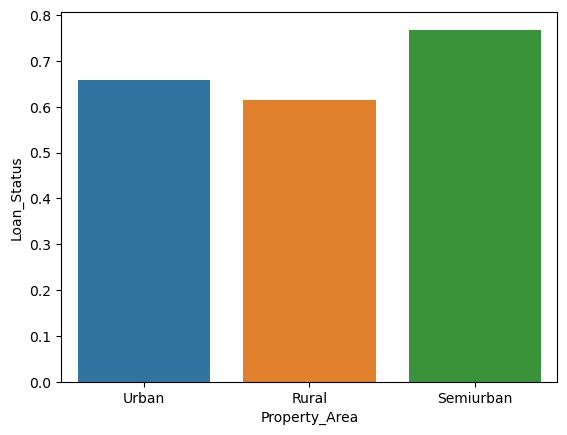

In [7]:
sns.barplot(x='Property_Area',y='Loan_Status',data=df1,ci=None)

In [8]:
df1['Total Income']=df1['ApplicantIncome']+df1['CoapplicantIncome']
df2['Total Income']=df2['ApplicantIncome']+df2['CoapplicantIncome']

In [9]:
train=df1
test=df2

In [10]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total Income          0
dtype: int64

In [11]:
cols=['Gender','Married','Dependents','Self_Employed','Credit_History']

In [12]:
train.loc[:,cols] =train.loc[:,cols].fillna(method = 'bfill')

In [13]:
train[['LoanAmount', 'Loan_Amount_Term']] = train[['LoanAmount', 'Loan_Amount_Term']].fillna(train[['LoanAmount', 'Loan_Amount_Term']].median())

In [14]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [15]:
train=MultiColumnLabelEncoder(columns = ['Dependents','Loan_Status','Property_Area']).fit_transform(train)

In [16]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
Total Income         float64
dtype: object


In [17]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Total Income          0
dtype: int64

In [18]:
cols=['Gender','Dependents','Self_Employed','Credit_History']
test.loc[:,cols] = test.loc[:,cols].fillna(method = 'bfill',axis=0)

In [19]:
test=MultiColumnLabelEncoder(columns = ['Dependents','Property_Area']).fit_transform(test)

In [20]:
test=test.drop('Loan_ID',axis=1)
train=train.drop('Loan_ID',axis=1)

In [21]:
corr_matrix=train.corr()
corr_matrix
corr_matrix.sort_values('Loan_Status',ascending=True,inplace=True)
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
print(corr_matrix['Loan_Status'])

CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Total Income        -0.031271
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Dependents           0.000113
Property_Area        0.032112
Credit_History       0.516944
Loan_Status          1.000000
Name: Loan_Status, dtype: float64


In [22]:
corr_matrix2=test.corr()
corr_matrix2
corr_matrix2.sort_values('Credit_History',ascending=True,inplace=True)
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corr_matrix2,annot=True,cmap='YlGnBu')
print(corr_matrix2['Credit_History'])

Dependents          -0.073208
CoapplicantIncome   -0.054640
Loan_Amount_Term    -0.021298
LoanAmount           0.009000
Property_Area        0.061253
Total Income         0.068682
ApplicantIncome      0.098693
Credit_History       1.000000
Name: Credit_History, dtype: float64


In [23]:
del train['ApplicantIncome']
del train['CoapplicantIncome']
del train['LoanAmount']
del train['Total Income']
del test['Total Income']
del test['ApplicantIncome']
del test['CoapplicantIncome']
del test['LoanAmount']

In [24]:
cat_col = ['Gender', 'Married','Education', 'Self_Employed']
for column in cat_col:
    train1 = pd.get_dummies(train, columns = cat_col)
    test1 = pd.get_dummies(test, columns = cat_col)

In [25]:
y = train['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(train1.drop('Loan_Status', axis = 1), y, test_size=0.20, random_state=42)

# Decision Tree

In [52]:
dt_cls= DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt= dt_cls.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred_dt)

array([[18, 25],
       [14, 66]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_dt)

0.6829268292682927

# Random Forest

In [55]:
rf_class=RandomForestClassifier()
rf_class=rf_class.fit(x_train,y_train)
y_pred_rf= rf_class.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_dt)

array([[18, 25],
       [14, 66]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred_dt)

0.6829268292682927

# SVC

In [57]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred_dt)

array([[18, 25],
       [14, 66]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred_dt)

0.6829268292682927

# Logistic Regression

In [35]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)
y_pred_logmodel=pipe.predict(x_test)
pipe.score(x_test, y_test)

0.7967479674796748

In [36]:
confusion_matrix(y_test,y_pred_logmodel)

array([[19, 24],
       [ 1, 79]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_logmodel)

0.7967479674796748

# knn

In [38]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [39]:
metric_k

[0.6666666666666666,
 0.6585365853658537,
 0.6585365853658537,
 0.6585365853658537,
 0.6991869918699187,
 0.7073170731707317,
 0.7073170731707317,
 0.6910569105691057,
 0.6585365853658537,
 0.6991869918699187,
 0.6747967479674797,
 0.6829268292682927]

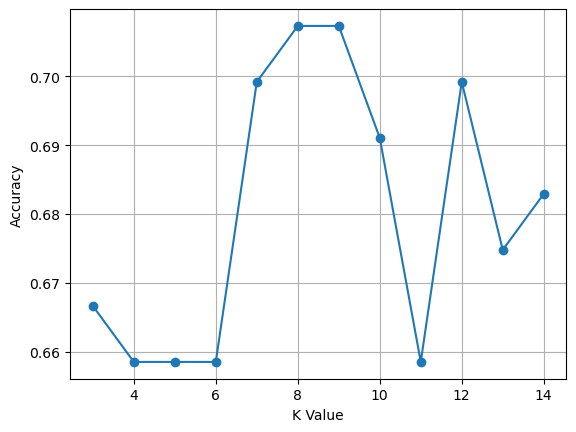

In [40]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [41]:
prediction1= DataFrame (y_pred_logmodel,columns=['Loan_Status'])

In [42]:
prediction2= DataFrame ( y_pred_knn,columns=['Loan_Status'])

In [43]:
prediction3= DataFrame ( y_pred_svm,columns=['Loan_Status'])

In [44]:
prediction4= DataFrame (y_pred_rf,columns=['Loan_Status'])

In [45]:
prediction5= DataFrame (y_pred_dt,columns=['Loan_Status'])

In [46]:
#prediction1.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionlogmodel.csv',header=False, index=False)

In [47]:
prediction1.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionlogmodel.csv',index=False,header=True)

In [48]:
prediction2.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionknn.csv',index=False,header=True)

In [49]:
prediction3.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionSVC.csv',index=False,header=True)

In [50]:
prediction4.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionRF.csv',index=False,header=True)

In [51]:
prediction5.to_csv(r'C:\Users\ajmal\Downloads\DSA\predictionDT.csv',index=False,header=True)